In [177]:
using Distributions, LinearAlgebra, Plots, Random, Roots

# Uniform:

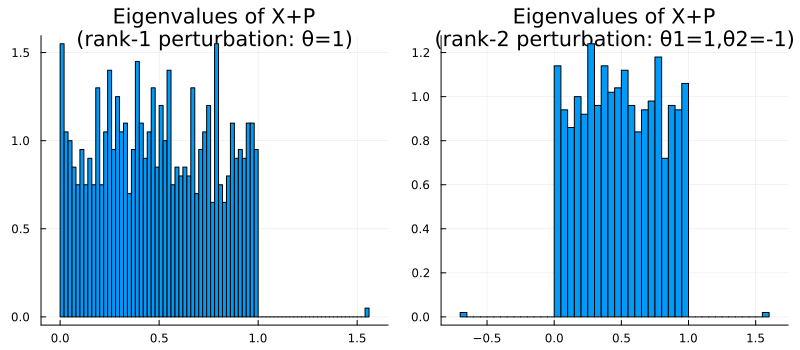

In [230]:
N = 1000
θ = 1
u = randn(N) / √N
v = randn(N) / √N

X = Diagonal(rand(Uniform(0,1), N))
P1 = θ*u*u'
P2 = θ*u*u'- θ*v*v'

h1 = histogram(eigvals(X+P1), nbins=100, normalize=:pdf, legend=false, title="Eigenvalues of X+P\n(rank-1 perturbation: θ=$θ)")
h2 = histogram(eigvals(X+P2), nbins=100, normalize=:pdf, legend=false, title="Eigenvalues of X+P\n(rank-2 perturbation: θ1=$θ,θ2=-$θ)")
display(plot(h1,h2, size=(800,350)))


# Gaussian Wigner matrix:

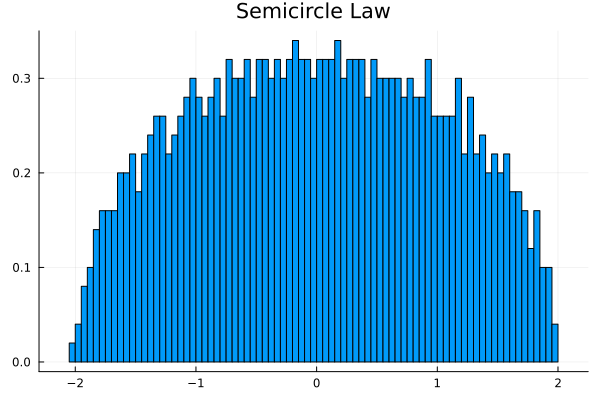

In [215]:
#return N*N symmetric Wigner matrix
function wigner(N)
    A = randn(N, N)
    return (A + A') / (√(2*N))
end 

N = 1000
X = wigner(N)
h1 = histogram(eigvals(X), nbins=100, normalize=:pdf, legend=false, title="Semicircle Law")
display(h1)

## Perturbation has Phase transitions: only when $\theta > 1$ do we have the spike eigenvalues

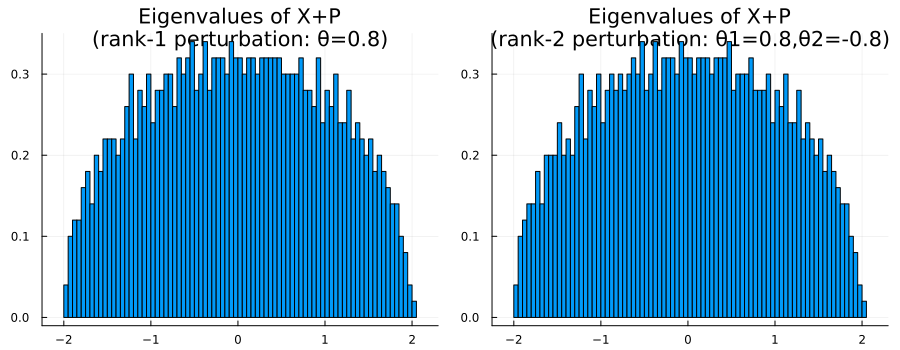

In [385]:
N = 1000
θ1 = 0.8
θ2 = -θ1
u = randn(N) / √N
v = randn(N) / √N

X = wigner(N)
P1 = θ1*u*u'
P2 = θ1*u*u'+ θ2*v*v'

h1 = histogram(eigvals(X+P1), nbins=100, normalize=:pdf, legend=false, title="Eigenvalues of X+P\n(rank-1 perturbation: θ=$θ1)")
h2 = histogram(eigvals(X+P2), nbins=100, normalize=:pdf, legend=false, title="Eigenvalues of X+P\n(rank-2 perturbation: θ1=$θ1,θ2=$θ2)")
display(plot(h1,h2, size=(900,350)))


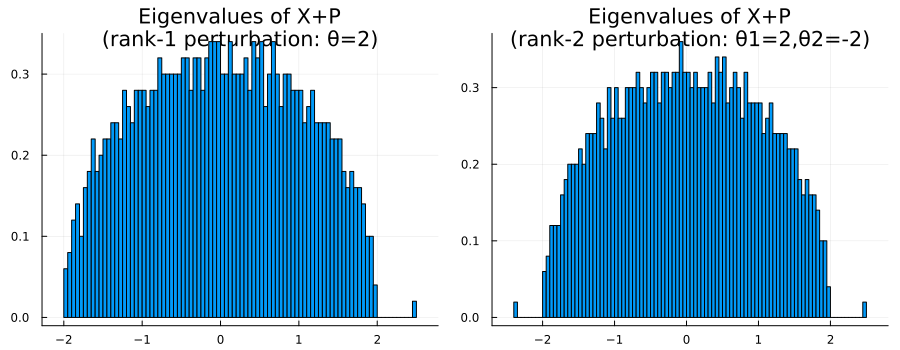

In [390]:
N = 1000
θ1 = 2
θ2 = -θ1
u = randn(N) / √N
v = randn(N) / √N

X = wigner(N)
P1 = θ1*u*u'
P2 = θ1*u*u'+ θ2*v*v'

h1 = histogram(eigvals(X+P1), nbins=100, normalize=:pdf, legend=false, title="Eigenvalues of X+P\n(rank-1 perturbation: θ=$θ1)")
h2 = histogram(eigvals(X+P2), nbins=100, normalize=:pdf, legend=false, title="Eigenvalues of X+P\n(rank-2 perturbation: θ1=$θ1,θ2=$θ2)")
display(plot(h1,h2, size=(900,350)))


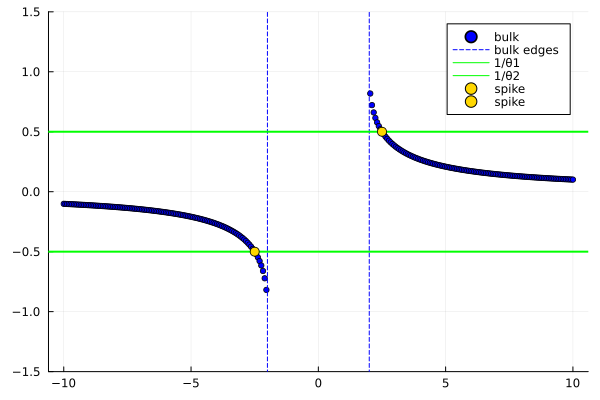

In [412]:
function G(z)
    if -2 < z && z < 2
        return NaN
    end
   return  (z-sign(z)*√(z^2-4)) / 2
end

function Ginv(g)
    return g+1/g

end

zz = LinRange(-10, 10, 300)
scatter(zz, G.(zz), c="blue", ylim=[-1.5,1.5], label="bulk", ms=3)
plot!([a,b], seriestype = :vline, c="blue", lw=1,ls=:dash,label="bulk edges")
plot!([1/θ1], seriestype = :hline, c="lime", lw=2, label="1/θ1")
plot!([1/θ2], seriestype = :hline, c="lime", lw=2, label="1/θ2")


scatter!((Ginv(1/θ1),1/θ1), c="gold", ms=5, label="spike")
scatter!((Ginv(1/θ2),1/θ2), c="gold", ms=5, label="spike")




In [409]:
1/θ

0.1

In [403]:
Ginv.(3:5)

3-element Vector{Float64}:
 3.3333333333333335
 4.25
 5.2

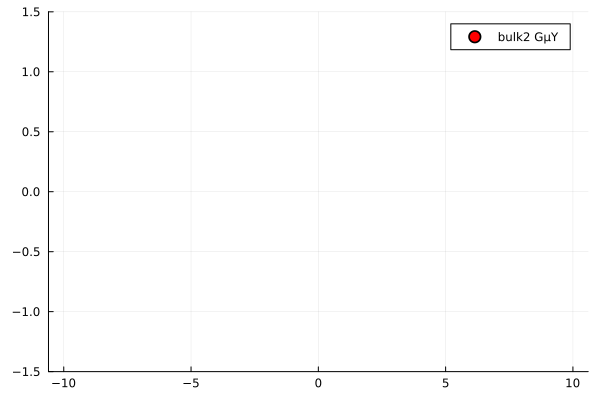

In [400]:
scatter(zz, Ginv.(zz), c="red", ylim=[-1.5,1.5], label="bulk2 GμY", ms=3)


# Spikes between two bulks:

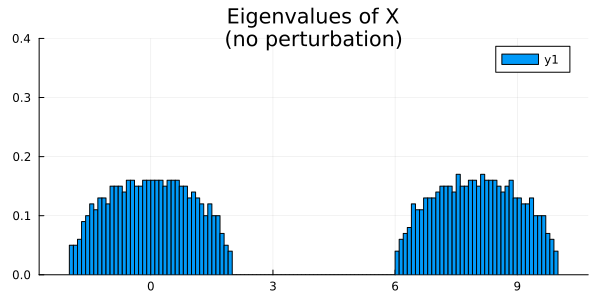

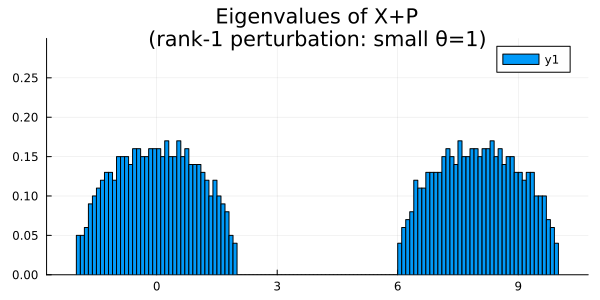

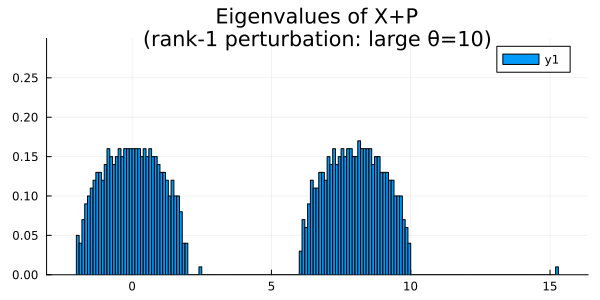

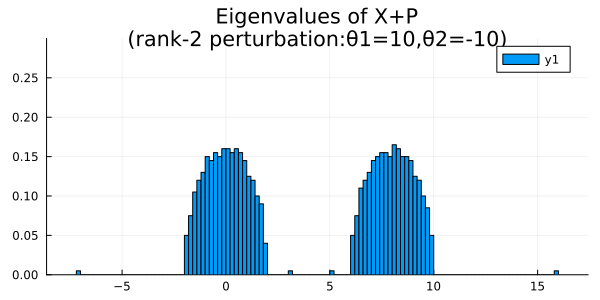

In [366]:
N = 500
shift = 8
X1 = wigner(N)
X2 = wigner(N) +  shift*I
X = zeros(2*N, 2*N)
X[1:N, 1:N] = X1
X[N+1:2*N, N+1:2*N] = X2;
h1 = histogram(eigvals(X), nbins=200, normalize=:pdf, ylim=(0,0.4), size=(600,300), title="Eigenvalues of X\n(no perturbation)")
display(h1)



θ1 = 1
u = randn(2*N) / √(2*N)
P = θ1*u*u'
Xt = X + P
h2 = histogram(eigvals(Xt), nbins=200, normalize=:pdf, ylim=(0,0.3), size=(600,300), title="Eigenvalues of X+P\n(rank-1 perturbation: small θ=$θ1)")
display(h2)


θ1 = 10
u = randn(2*N) / √(2*N)
P = θ1*u*u'
Xt = X + P
h2 = histogram(eigvals(Xt), nbins=200, normalize=:pdf, ylim=(0,0.3), size=(600,300), title="Eigenvalues of X+P\n(rank-1 perturbation: large θ=$θ1)")
display(h2)

θ1 = 10
θ2 = -10
u = randn(2*N) / √(2*N)
v = randn(2*N) / √(2*N)
P = θ1*u*u' + θ2*v*v'
Xt = X + P
h2 = histogram(eigvals(Xt), nbins=200, normalize=:pdf, ylim=(0,0.3), size=(600,300), title="Eigenvalues of X+P\n(rank-2 perturbation:θ1=$θ1,θ2=$θ2)")
display(h2)

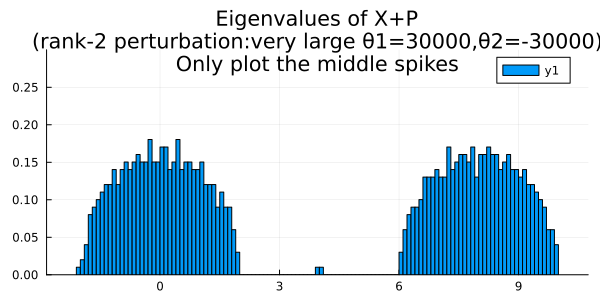

In [357]:

θ1 = 30000
θ2 = -30000
u = randn(2*N) / √(2*N)
v = randn(2*N) / √(2*N)
P = θ1*u*u' + θ2*v*v'
Xt = X + P
h2 = histogram(eigvals(Xt)[2:end-1], nbins=200, normalize=:pdf, ylim=(0,0.3), size=(600,300), title="Eigenvalues of X+P\n(rank-2 perturbation:very large θ1=$θ1,θ2=$θ2)\nOnly plot the middle spikes")
display(h2)

## Theoretical Analysis:
Let standard bulk has support $[a,b]$ and shifted bulk has support $[c,d]$. Then: 

Let $\text{bulk1_right}=\frac{z-\sqrt{z^2-4}}{2}$, $\text{bulk1_left}=\frac{z+\sqrt{z^2-4}}{2}$.

Let $\text{bulk2_right}=\frac{(z-shift)-\sqrt{(z-shift)^2-4}}{2}$, $\text{bulk2_left}=\frac{(z-shift)+\sqrt{(z-shift)^2-4}}{2}$, 


The top spike is solution $z\in(d,\infty)$ to:  $\text{bulk1_right+bulk2_right}=\frac{2}{\theta_1}$.

The tail spike is solution $z\in(-\infty, a)$  to:  $\text{bulk1_left+bulk2_left}=\frac{2}{\theta_2}$.

The middles spikes are solutions  $z\in(b,c)$ to:
$\text{bulk1_right+bulk2_left}=\frac{2}{\theta_1}$ and $\text{bulk1_right+bulk2_left}=\frac{2}{\theta_2}$

In [364]:


#the curve between bulks is the composition of the right curve of first bulk (standard)
# and the left curve of second bulk (shifted)

function solve_helper(z)
    bulk1_right = (z-√(z^2-4)) / 2
    bulk1_left = (z+√(z^2-4)) / 2
    bulk2_right = ((z-shift)-√((z-shift)^2-4)) / 2
    bulk2_left = ((z-shift)+√((z-shift)^2-4)) / 2
    if z >= d
        return bulk1_right + bulk2_right
    elseif z <= a
        return bulk1_left + bulk2_left
    elseif b<=z && z<=c 
        return bulk1_right + bulk2_left
    end
end


a,b = -2,2
c,d = a+shift, b+shift
println("Bulk edges a,b=$a,$b and c,d=$c,$d")


z_top = find_zero(z->(solve_helper(z)-2/θ1), (d,99))
z_tail = find_zero(z->(solve_helper(z)-2/θ2), (-99,a))
z_middle_1 = find_zero(z->(solve_helper(z)-2/θ1), (b,c))
z_middle_2 = find_zero(z->(solve_helper(z)-2/θ2), (b,c))
println("z_top =", z_top)
println("z_tail =", z_tail)
println("z_middle_1 =", z_middle_1)
println("z_middle_2 =", z_middle_2)

Bulk edges a,b=-2,2 and c,d=6,10
z_top =15.525247231992488
z_tail =-7.525247231992478
z_middle_1 =2.8819384028299626
z_middle_2 =5.118061597170037


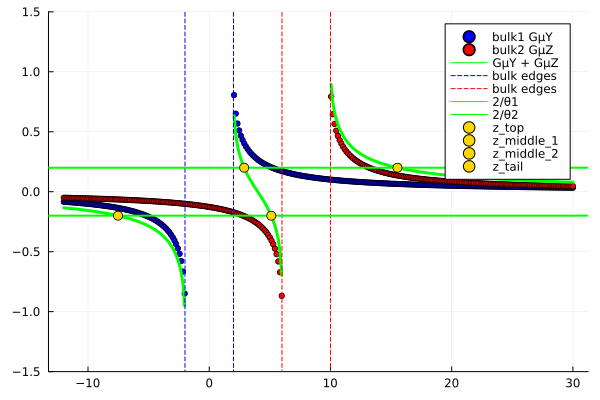

In [373]:
# function G(z)
#     if -2 < z && z < 2
#         return NaN
#     end
#    return  (z-sign(z)*√(z^2-4)) / 2
# end

zz = LinRange(-12, 30, 300)
scatter(zz, G.(zz), c="blue", ylim=[-1.5,1.5], label="bulk1 GμY", ms=3)
scatter!(zz, G.(zz.-shift), c="red", label="bulk2 GμZ", ms=3)
plot!(zz, G.(zz) .+ G.(zz.-shift), c="lime", lw=3, label="GμY + GμZ")
plot!([a,b], seriestype = :vline, c="blue", lw=1,ls=:dash,label="bulk edges")
plot!([c,d], seriestype = :vline, c="red", lw=1, ls=:dash,label="bulk edges")

plot!([2/θ1], seriestype = :hline, c="lime", lw=2, label="2/θ1")
plot!([2/θ2], seriestype = :hline, c="lime", lw=2, label="2/θ2")


scatter!((z_top,2/θ1), c="gold", ms=5, label="z_top")
scatter!((z_middle_1,2/θ1), c="gold", ms=5, label="z_middle_1")
scatter!((z_middle_2,2/θ2), c="gold", ms=5, label="z_middle_2")
scatter!((z_tail,2/θ2), c="gold", ms=5, label="z_tail")


